In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Define the molecule
symbols  = ['H', 'H', 'H']
geometry = np.array([[0.01076341,  0.04449877,  0.0],
                        [0.98729513,  1.63059094,  0.0],
                        [1.87262415, -0.00815842,  0.0]], requires_grad = False)
electrons = 2
charge = 1

# Build the electronic Hamiltonian
H, qubits = qml.qchem.molecular_hamiltonian(symbols, geometry, charge=charge)

# Define the HF state
hf_state = qml.qchem.hf_state(electrons, qubits)

# Generate single and double excitations
singles, doubles = qml.qchem.excitations(electrons, qubits)

# Map excitations to the wires the UCCSD circuit will act on
s_wires, d_wires = qml.qchem.excitations_to_wires(singles, doubles)

# Define the device
dev = qml.device("default.qubit", wires=qubits)

# Define the qnode
@qml.qnode(dev)
def circuit(params, wires, s_wires, d_wires, hf_state):
    qml.UCCSD(params, wires, s_wires, d_wires, hf_state)
    return qml.expval(H)

# Define the initial values of the circuit parameters
params = np.zeros(len(singles) + len(doubles))

# Define the optimizer
optimizer = qml.GradientDescentOptimizer(stepsize=0.5)

# Optimize the circuit parameters and compute the energy
energies = []
for n in range(21):
    params, energy = optimizer.step_and_cost(circuit, params,
    wires=range(qubits), s_wires=s_wires, d_wires=d_wires, hf_state=hf_state)
    if n % 2 == 0:
        energies.append(energy)
        print("step = {:},  E = {:.8f} Ha".format(n, energy))

step = 0,  E = -1.24654994 Ha
step = 2,  E = -1.27016844 Ha
step = 4,  E = -1.27379541 Ha
step = 6,  E = -1.27434106 Ha
step = 8,  E = -1.27442311 Ha
step = 10,  E = -1.27443547 Ha
step = 12,  E = -1.27443733 Ha
step = 14,  E = -1.27443761 Ha
step = 16,  E = -1.27443765 Ha
step = 18,  E = -1.27443766 Ha
step = 20,  E = -1.27443766 Ha


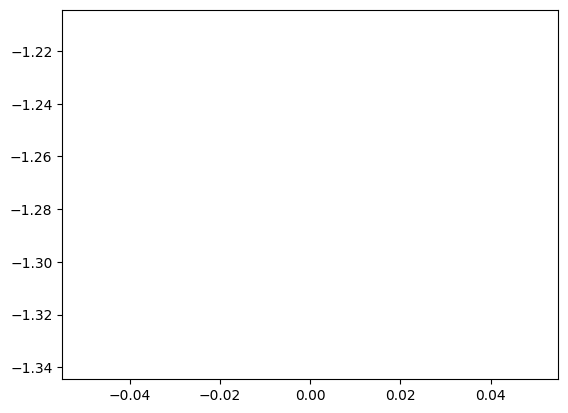

In [3]:
plt.plot(energy)